In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import pylab

In [55]:
nodes = pd.read_csv('cleaned_top_ingreds.csv')
nodes = nodes.drop('Unnamed: 0', axis=1)
edges = pd.read_csv('filtered_pairs.csv')
edges = edges.drop('Unnamed: 0', axis=1)

In [56]:
print(nodes.shape, edges.shape)

(196, 3) (17833, 4)


In [57]:
edges.head()

pairs  counts            ingred1  \
0          ('all-purpose flour', 'almond')     657  all-purpose flour   
1  ('all-purpose flour', 'almond extract')     634  all-purpose flour   
2           ('all-purpose flour', 'apple')     356  all-purpose flour   
3         ('all-purpose flour', 'avocado')      53  all-purpose flour   
4           ('all-purpose flour', 'bacon')     411  all-purpose flour   

          ingred2  
0          almond  
1  almond extract  
2           apple  
3         avocado  
4           bacon

In [121]:
edge_count_df = edges.groupby('ingred1').agg({'counts':'sum'}).join(edges.groupby('ingred2').agg({'counts':'sum'}), lsuffix='1', rsuffix='2').fillna(0)
edge_count_df['total_edges'] = (edge_count_df['counts1'] + edge_count_df['counts2']).astype('int')
edge_count_df = edge_count_df.drop(['counts1','counts2'],axis=1)
edge_count_df.head()

total_edges
ingred1                       
all-purpose flour       174402
almond                   14392
almond extract            7934
apple                     7247
avocado                   9002

In [59]:
len(list(set(list(edges['ingred1'].unique()) + list(edges['ingred2'].unique()))))

196

In [64]:
G = nx.Graph()

In [67]:
# Add edges and edge attributes
for i, elrow in edges.iterrows():
    G.add_edge(elrow[2], elrow[3], attr_dict=elrow[0:2].to_dict())

In [72]:
# Add node attributes
for i, nlrow in nodes.iterrows():
    G.add_node(nlrow['ingredient'], attr_dict=nlrow[1:].to_dict())

In [144]:
recipe_count_map = [x[1]['attr_dict']['recipes'] for x in list(G.nodes(data=True))]

/Applications/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


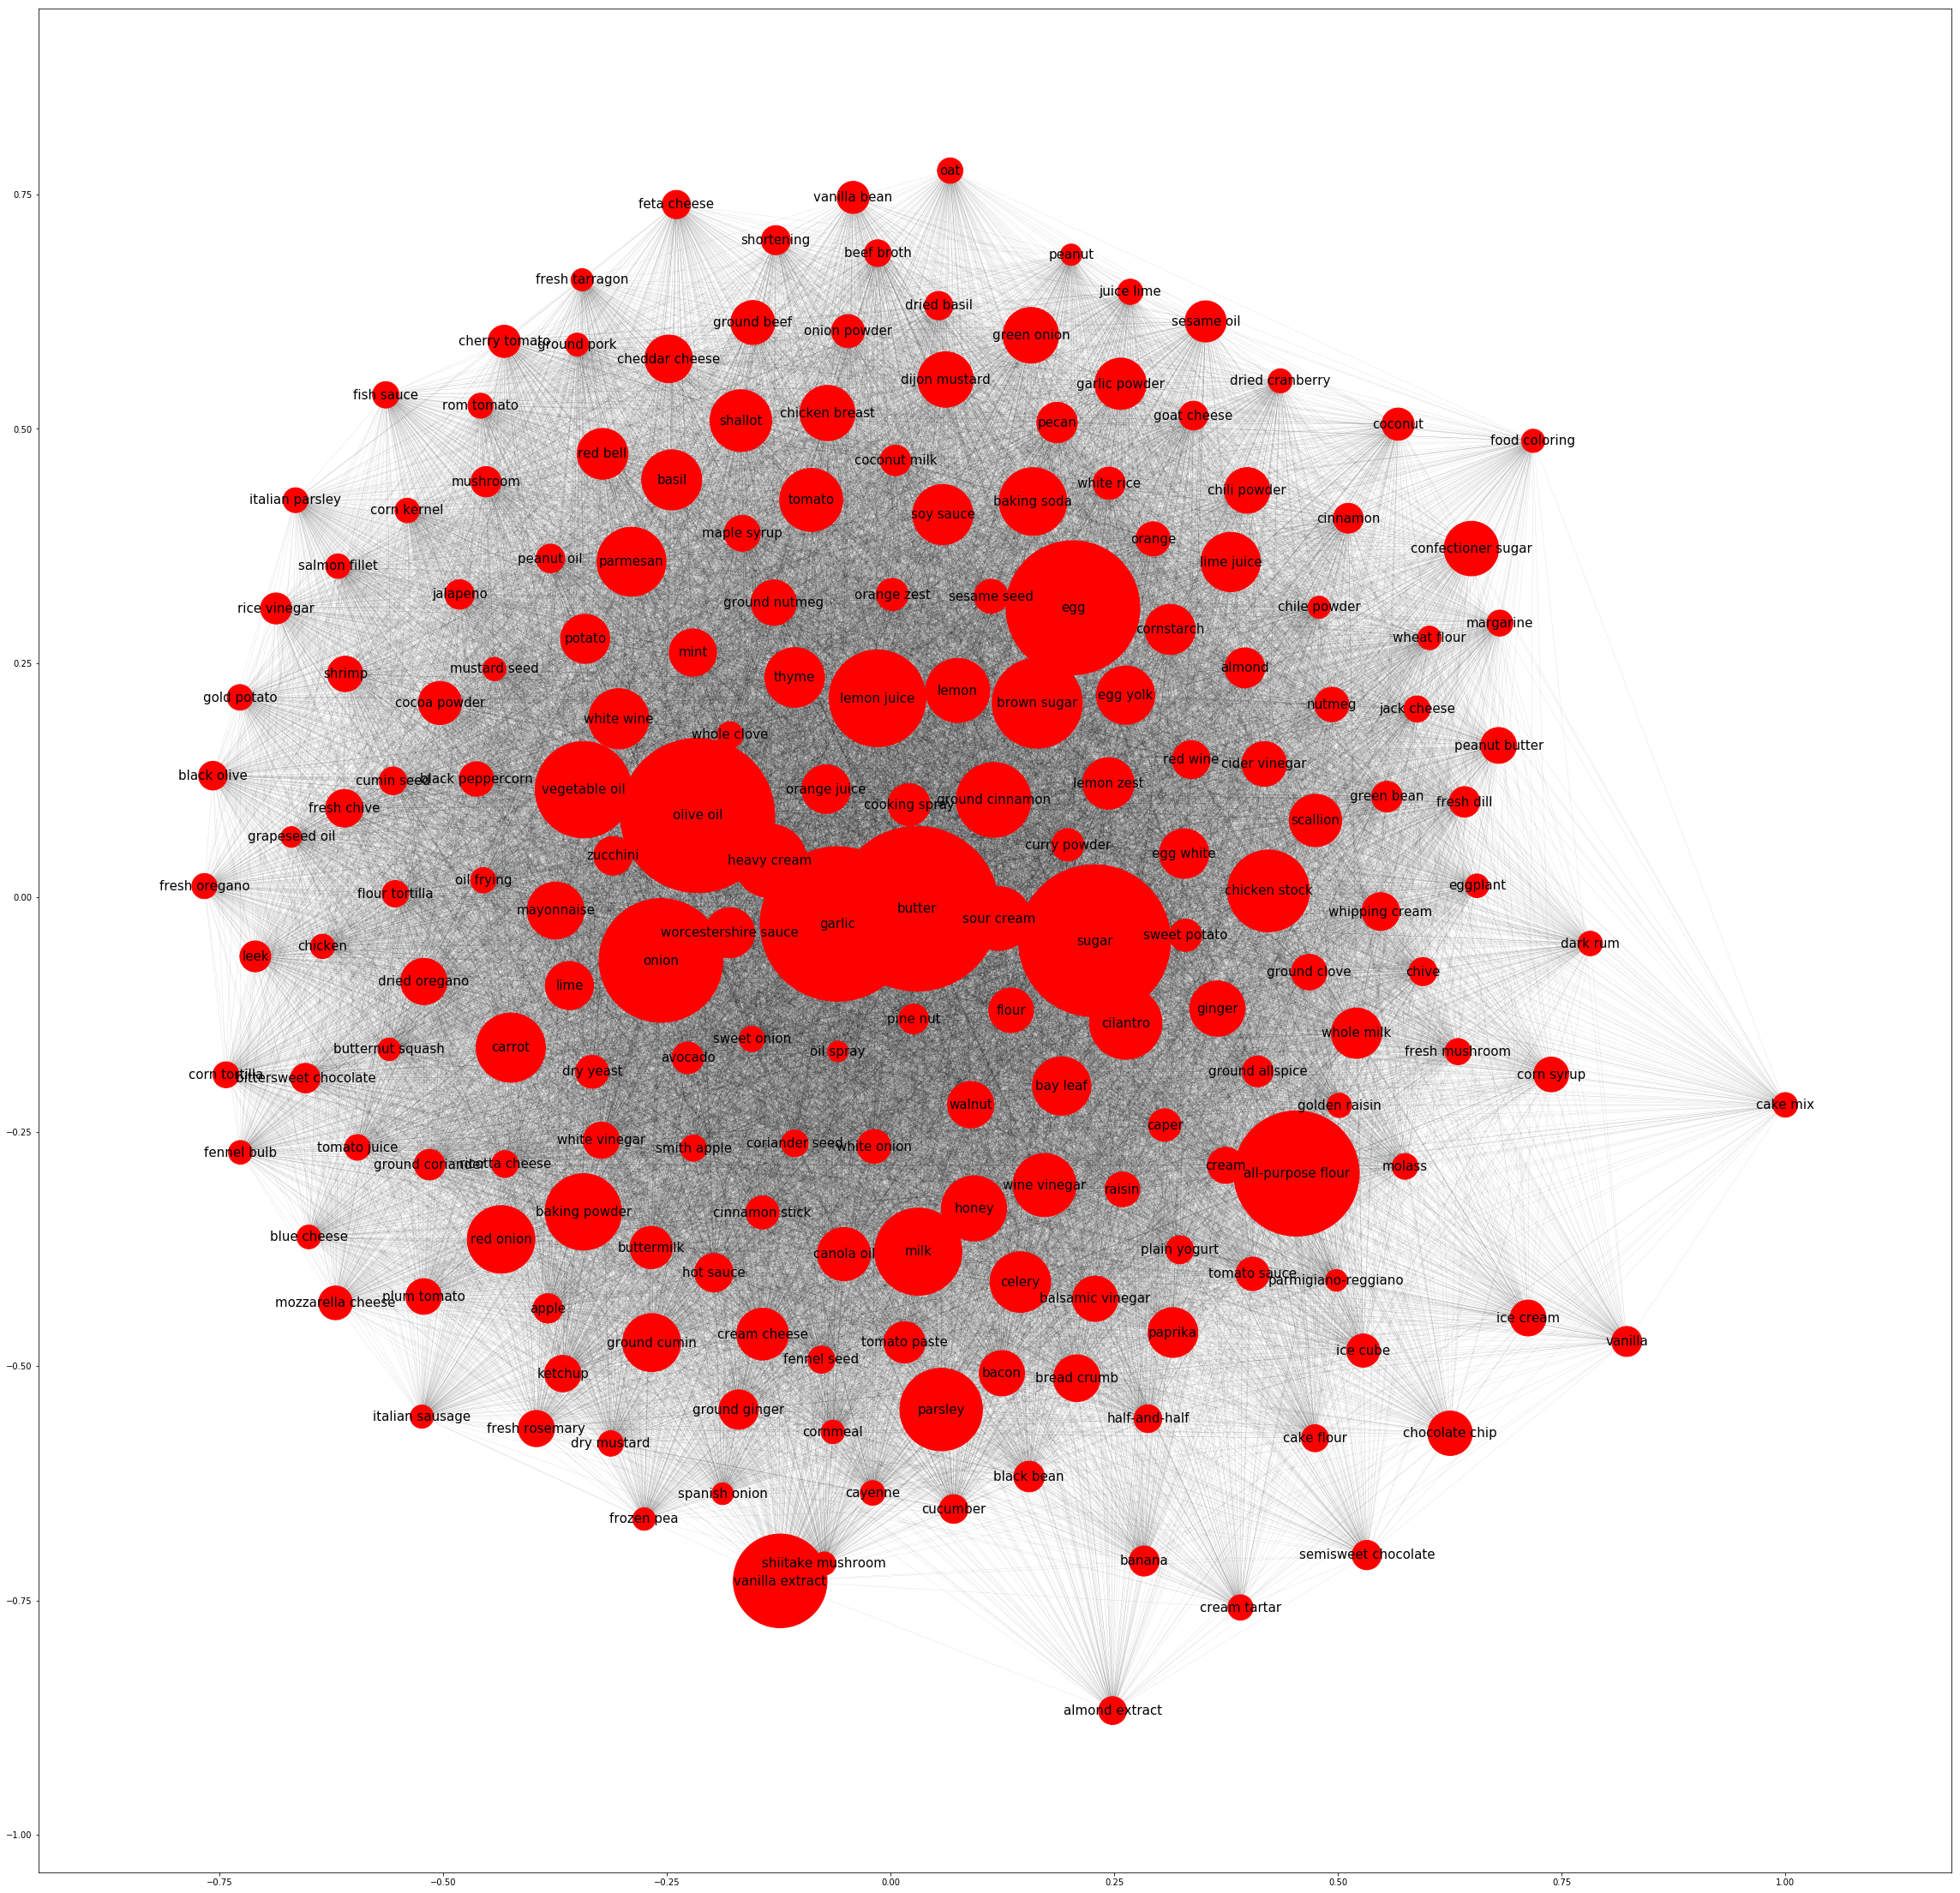

In [145]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, pos, font_color='black', font_size=15, width=0.05, node_size=recipe_count_map)

/Applications/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


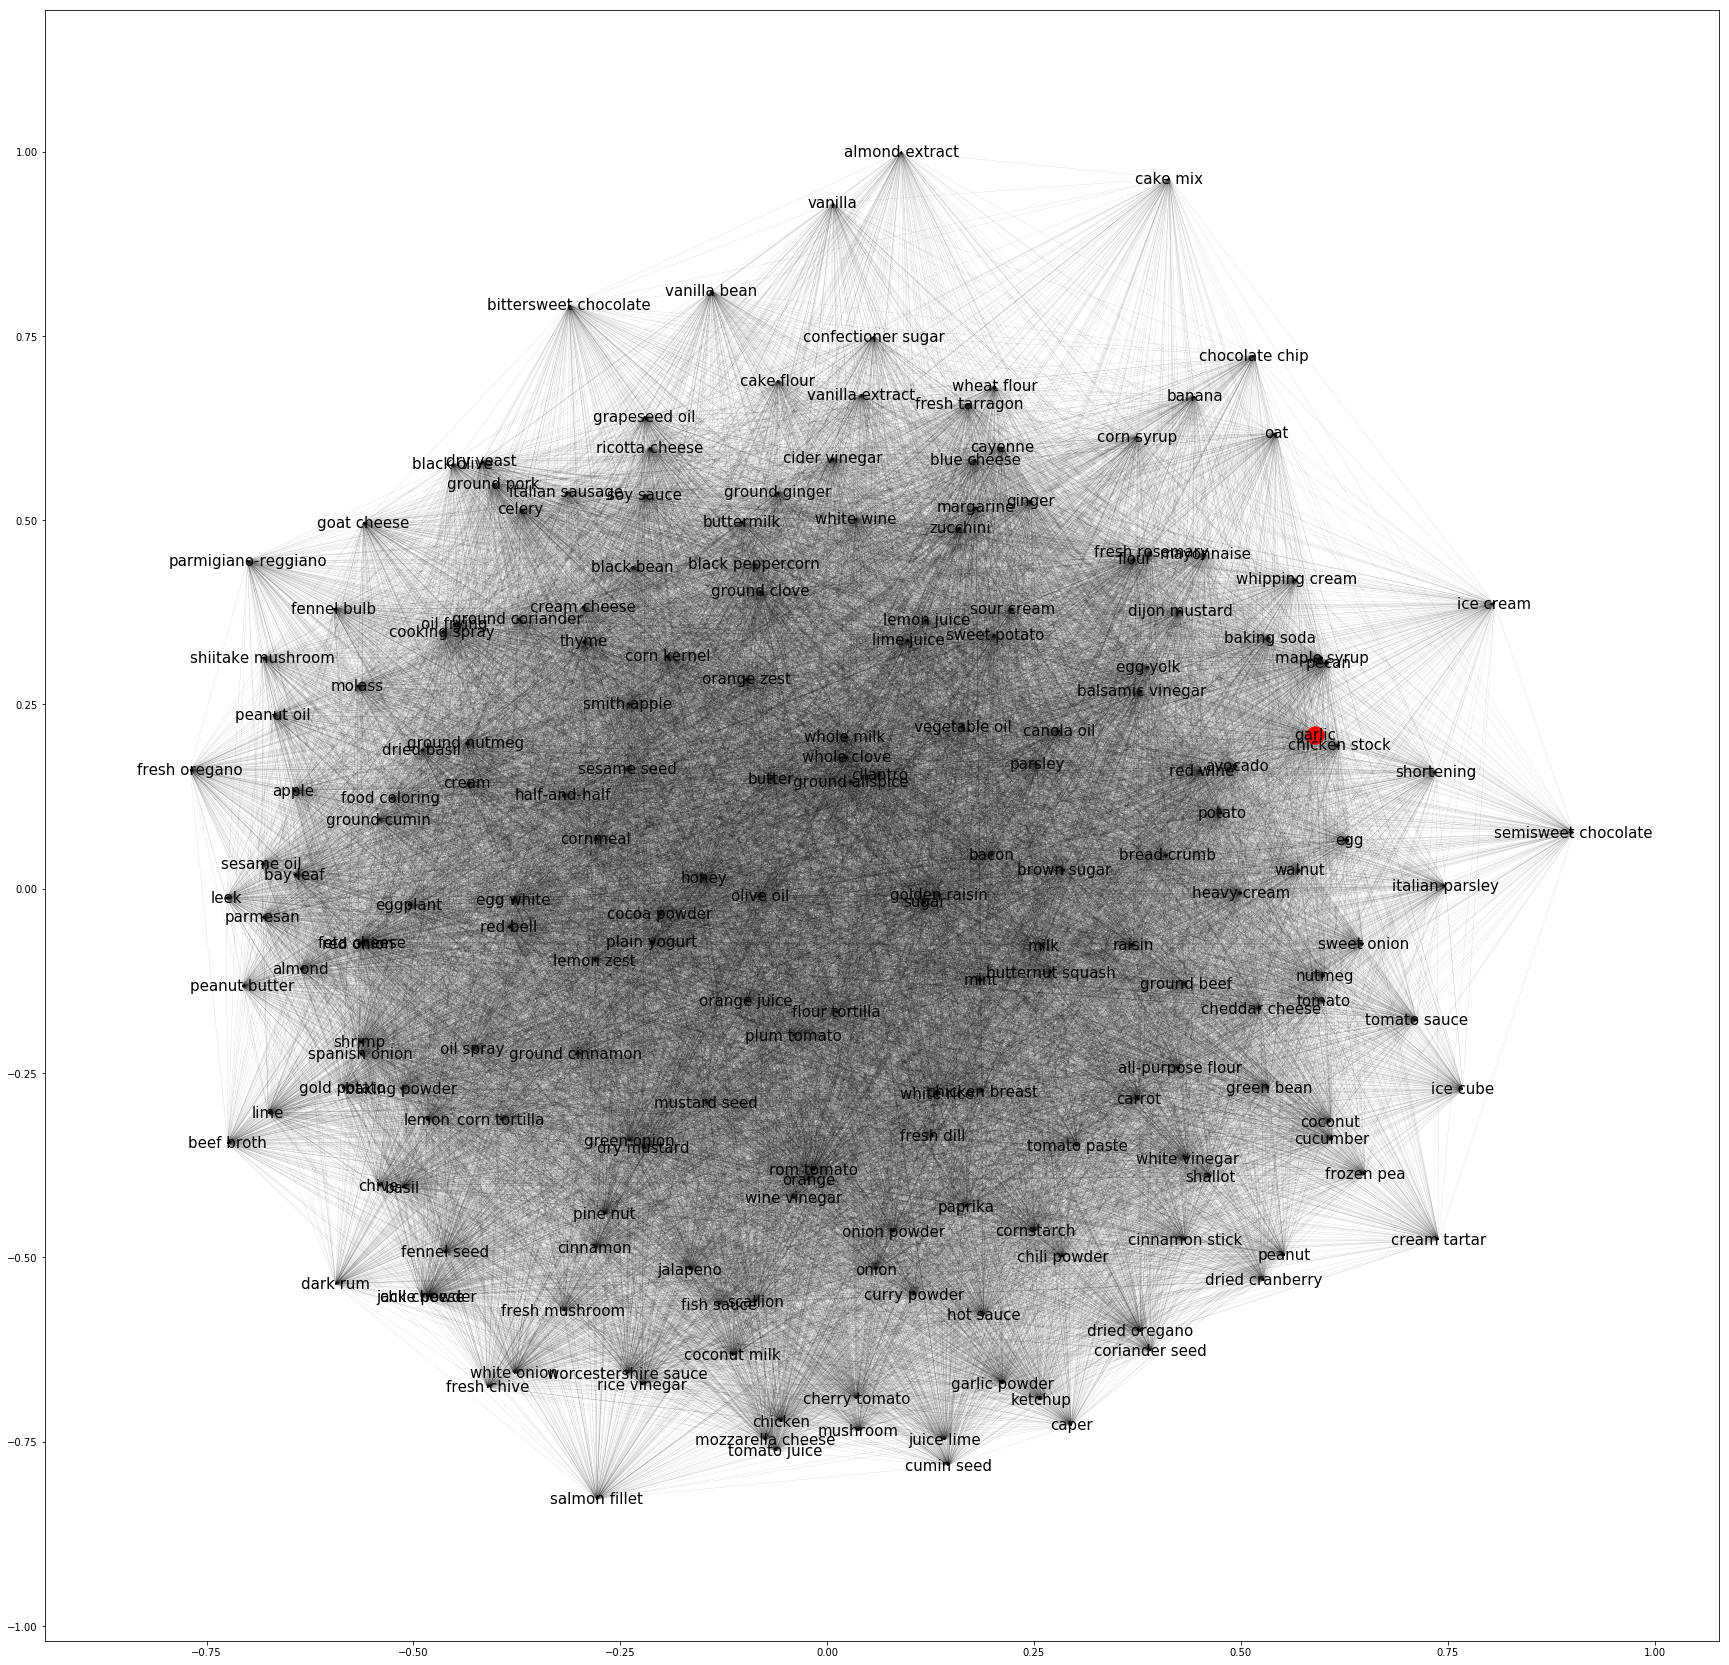

In [114]:
plt.figure(figsize=(30,30))
pos=nx.spring_layout(G)
nx.draw_networkx(G, font_color='black', font_size=15, width=0.05, nodelist=list(G.nodes())[1:2])